In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [48]:
#Read in the data

df = pd.read_csv(r'C:\Users\DATA ANALYST\Downloads\DATA ANALYSIS PROJECTS\ALEX THE ANALYST\PYTHON PROJECTS\movies.csv')

In [49]:
df.shape

(7668, 15)

In [50]:
# Let's look at the first five rows in the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [51]:
# Check for missing valoes

df.isnull()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


In [52]:
# Percentage of missing values in each column'

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [53]:
# Number of missing values in each column

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [54]:
# Total Number of missing values in the dataframe

df.isnull().sum().sum()

2473

## Handle Missing Values

In [55]:
# Using interpolate() function to fill missing values in score, votes, budget, gross and runtime columns

df['score'] = df['score'].interpolate(method='linear')
df['votes'] = df['votes'].interpolate(method='linear')
df['budget'] = df['budget'].interpolate(method='linear')
df['gross'] = df['gross'].interpolate(method='linear')
df['runtime'] = df['runtime'].interpolate(method='linear')

df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,13266.0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,32875.0,13266.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,13266.0,Embi Productions,105.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",5.7,18.0,James Randall,James Randall,Christina Roz,United States,15000.0,13266.0,NaN,120.0


In [56]:
#Verify that there are no missing values in the interpolated columns

df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [57]:
# Using the fillna() function to fill missing values in the rating column

df['rating'] = df['rating'].fillna(method='pad')

df 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,13266.0,NaN,90.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,32875.0,13266.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,13266.0,Embi Productions,105.0
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",5.7,18.0,James Randall,James Randall,Christina Roz,United States,15000.0,13266.0,NaN,120.0


In [58]:
df.isnull().sum().sum()

26

In [59]:
# Using dropna() function to drop remove rows with missing values

df = df.dropna()

In [60]:
df.isnull().sum().sum()

0

## Change Data Types

In [61]:
# Let's see the data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [62]:
#Change the data type of columns with float64


df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [63]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,Aloha Surf Hotel,Not Rated,Comedy,2020,"November 5, 2020 (United States)",7.100000,1.400000e+01,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,668333,13266,Abominable Pictures,90.0
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",5.766667,1.533333e+01,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000,13266,Dow Jazz Films,121.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.700000,3.600000e+01,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,32875,13266,Cactus Blue Entertainment,90.0
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,2.900000e+01,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,13266,Embi Productions,105.0


In [64]:
#using a regular expression to extract the correct year from the "released" column

df['yearcorrect'] = df['released'].str.extract(r'(\d{4})') # You can also use the line of code below to achieve the same purpose
#df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,Aloha Surf Hotel,Not Rated,Comedy,2020,"November 5, 2020 (United States)",7.100000,1.400000e+01,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,668333,13266,Abominable Pictures,90.0,2020
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",5.766667,1.533333e+01,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000,13266,Dow Jazz Films,121.0,2020
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.700000,3.600000e+01,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,32875,13266,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,2.900000e+01,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,13266,Embi Productions,105.0,2020


In [65]:
df = df.sort_values(by=["gross"], inplace=False, ascending=False)

In [66]:
# This let's us view the entire data not just the first and last five row as set by default
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_rows', 20)# This displays first and last 10 rows

In [67]:
# Drop any duplicates

# df['company'].drop_duplicates().sort_values(ascending=False)

# df.drop_duplicates()

<function matplotlib.pyplot.show(close=None, block=None)>

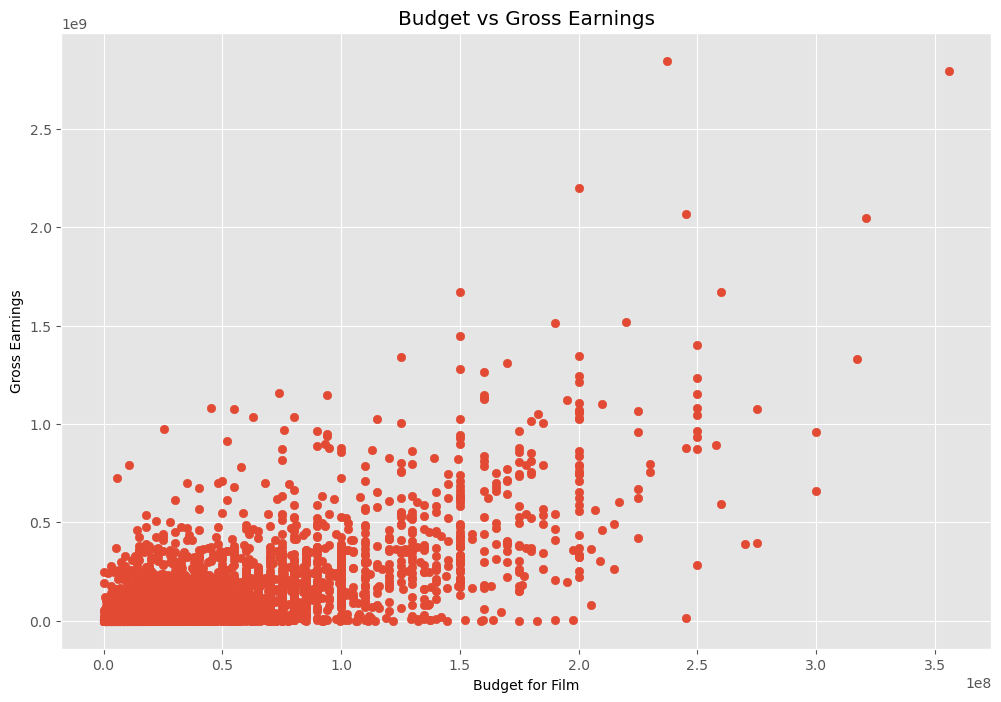

In [68]:
# Scatter plot of budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')

plt.ylabel('Gross Earnings')

plt.show

In [69]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

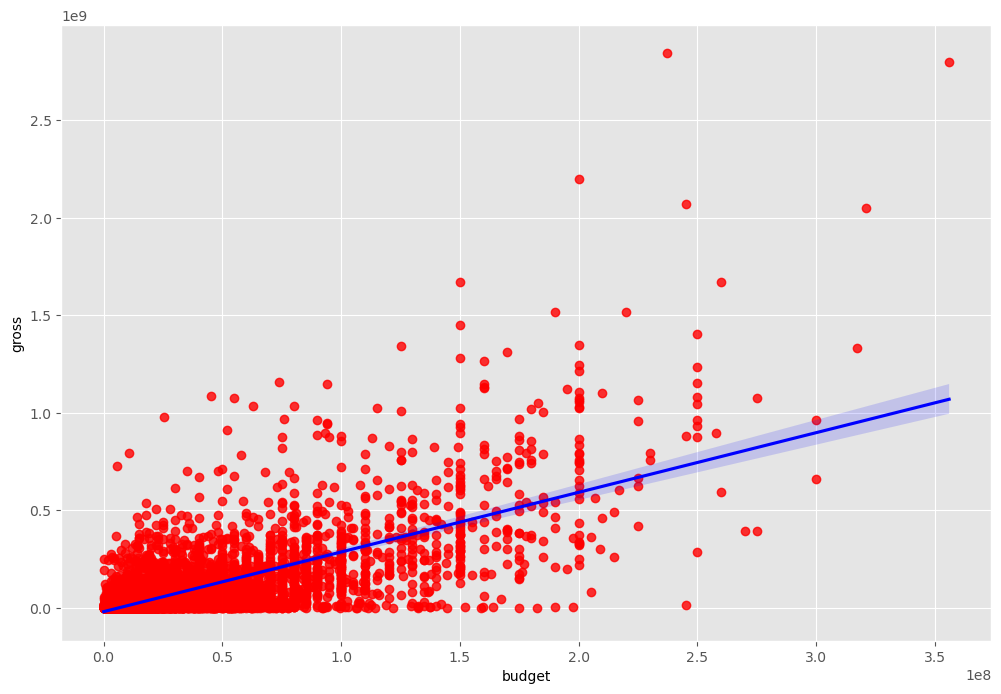

In [70]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [71]:
# Let's start looking at Correlation

# df.corr() # Calling corr() function uses the pearson method by default. You can call other methods using the code below

df.corr(method='pearson') # method can be either 'pearson', 'spearman', or 'kendall'

C:\Users\DATA ANALYST\AppData\Local\Temp\ipykernel_18748\4087965104.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') # method can be either 'pearson', 'spearman', or 'kendall'


,year,score,votes,budget,gross,runtime
year,1.000000,0.097751,0.222949,0.353111,0.259536,0.119826
score,0.097751,1.000000,0.409495,0.081608,0.185740,0.399886
votes,0.222949,0.409495,1.000000,0.448607,0.631235,0.308848
budget,0.353111,0.081608,0.448607,1.000000,0.705335,0.270976
gross,0.259536,0.185740,0.631235,0.705335,1.000000,0.243359
runtime,0.119826,0.399886,0.308848,0.270976,0.243359,1.000000


C:\Users\DATA ANALYST\AppData\Local\Temp\ipykernel_18748\1107311367.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_matrix = df.corr(method='pearson')


<function matplotlib.pyplot.show(close=None, block=None)>

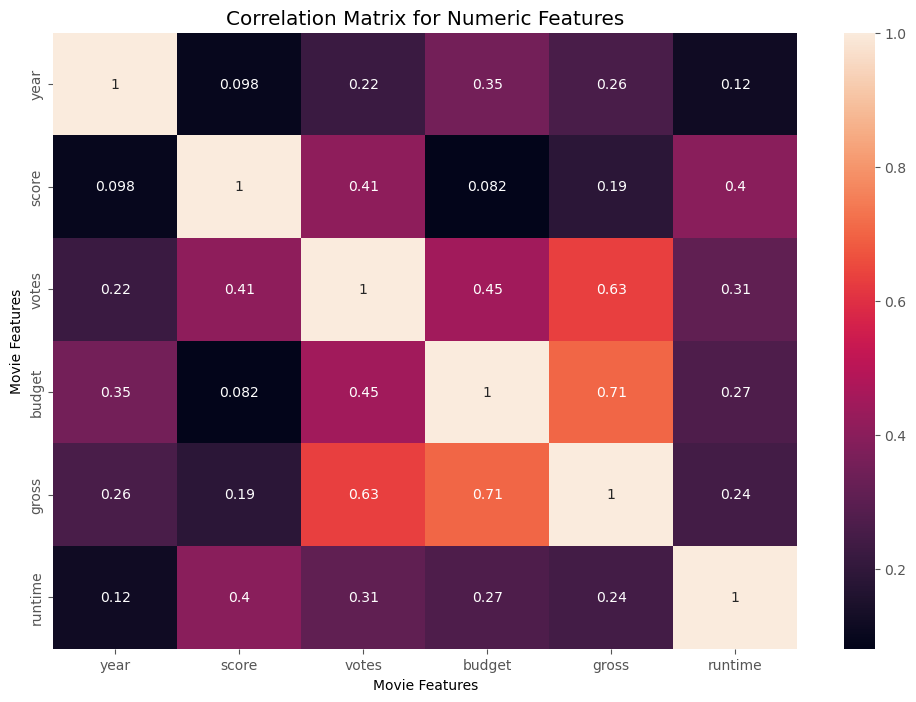

In [72]:
# Visualizing Correlations

Correlation_matrix = df.corr(method='pearson')

sns.heatmap(Correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show

In [73]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,532,5,0,2009,694,7.8,1100000.0,1153,1775,2326,55,237000000,2847246203,2248,162.0,29
7445,534,5,0,2019,181,8.4,903000.0,162,740,2233,55,356000000,2797501328,1601,181.0,39
3045,6876,5,6,1997,702,7.8,1100000.0,1153,1775,1587,55,200000000,2201647264,2248,194.0,17
6663,5131,5,0,2015,696,7.8,876000.0,1123,2542,520,55,245000000,2069521700,1535,138.0,35
7244,535,5,0,2018,190,8.4,897000.0,162,740,2233,55,321000000,2048359754,1601,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3351,6,4,2000,1116,6.5,5200.0,729,1120,2311,54,22500000,1400,474,103.0,21
7625,6701,3,4,2019,1146,5.7,320.0,2536,2557,1907,55,69133333,790,2303,104.0,39
7580,4652,3,5,2019,1832,5.2,735.0,1441,2197,2270,55,17250000,682,1987,93.0,40
2417,3397,4,6,1993,84,7.3,5100.0,33,1715,2554,27,11900000,596,792,134.0,13


In [74]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<function matplotlib.pyplot.show(close=None, block=None)>

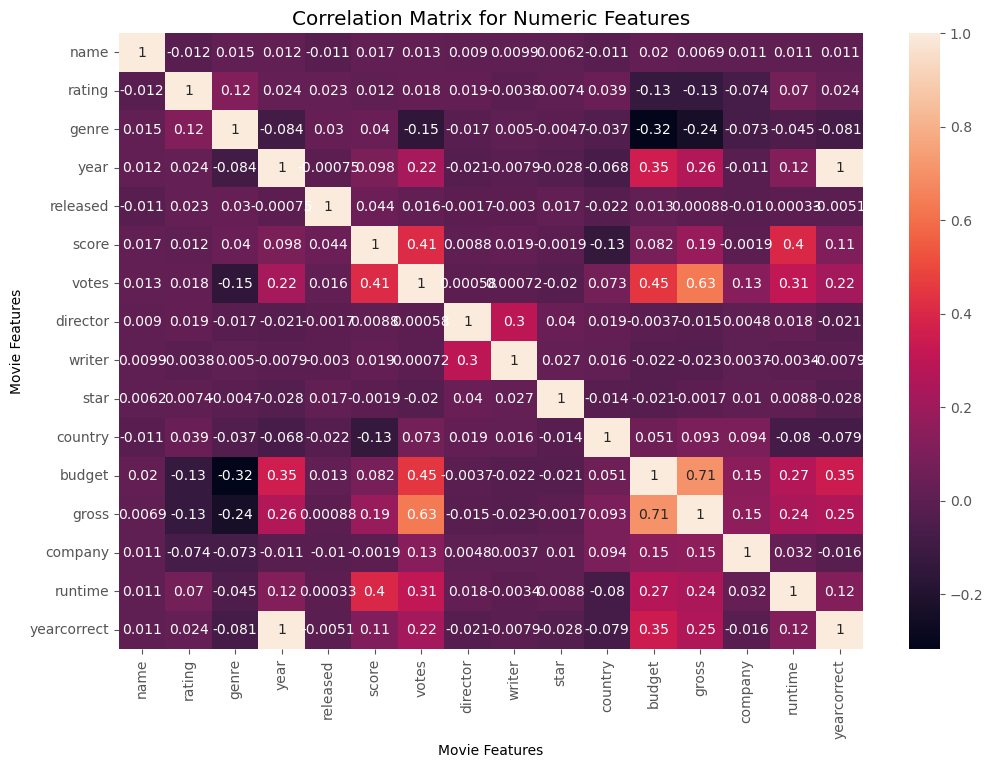

In [75]:
# Visualizing Correlations of the numerized dataframe

Correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(Correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show

In [77]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.011983
             genre          0.015234
             year           0.012005
             released      -0.010584
                              ...   
yearcorrect  budget         0.346160
             gross          0.252600
             company       -0.016156
             runtime        0.119633
             yearcorrect    1.000000
Length: 256, dtype: float64

In [78]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.317443
budget       genre         -0.317443
genre        gross         -0.238435
gross        genre         -0.238435
votes        genre         -0.150238
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [79]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.631235
votes        gross          0.631235
gross        budget         0.705335
budget       gross          0.705335
year         yearcorrect    0.997404
yearcorrect  year           0.997404
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# votes and budget has the highest correlation to gross earnings while company has low correlation to gross earning